git hub link: https://github.com/GalBH12/Eexrecise-3

Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

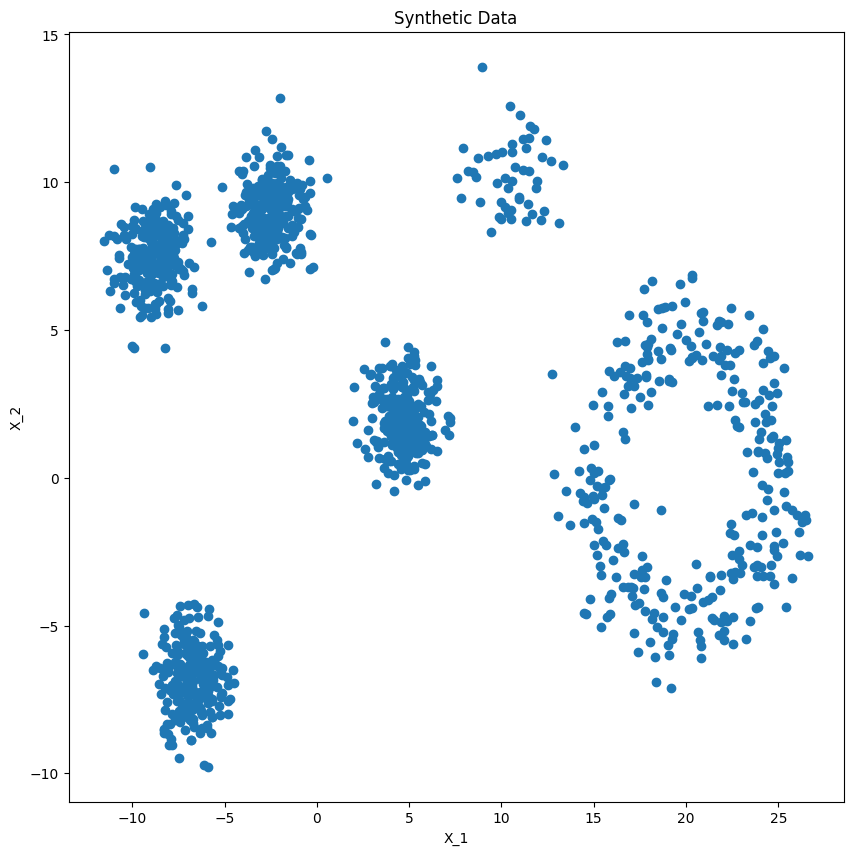

In [2]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Synthetic Data')
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_values = range(2 ,10)
silhouette_scores = []

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X)
  labels = kmeans.labels_
  silhouette_avg = silhouette_score(X, labels)
  silhouette_scores.append(silhouette_avg)
  if silhouette_avg == max(silhouette_scores):
    best_k = k
    best_kmeans = kmeans

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
print(f"Best k: {best_k}")

Best k: 6


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [53]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClusteringagglo = AgglomerativeClustering(n_clusters=6, compute_full_tree='auto', distance_threshold=None)
agglo.fit(X)
agglo_labels = agglo.labels_

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [27]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples= 5, metric = 'euclidean', algorithm = 'auto', leaf_size = 30, n_jobs = -1)
dbscan.fit(X)
dbscan_labels = dbscan.labels_

6. Compare the results and choose the best method for the data


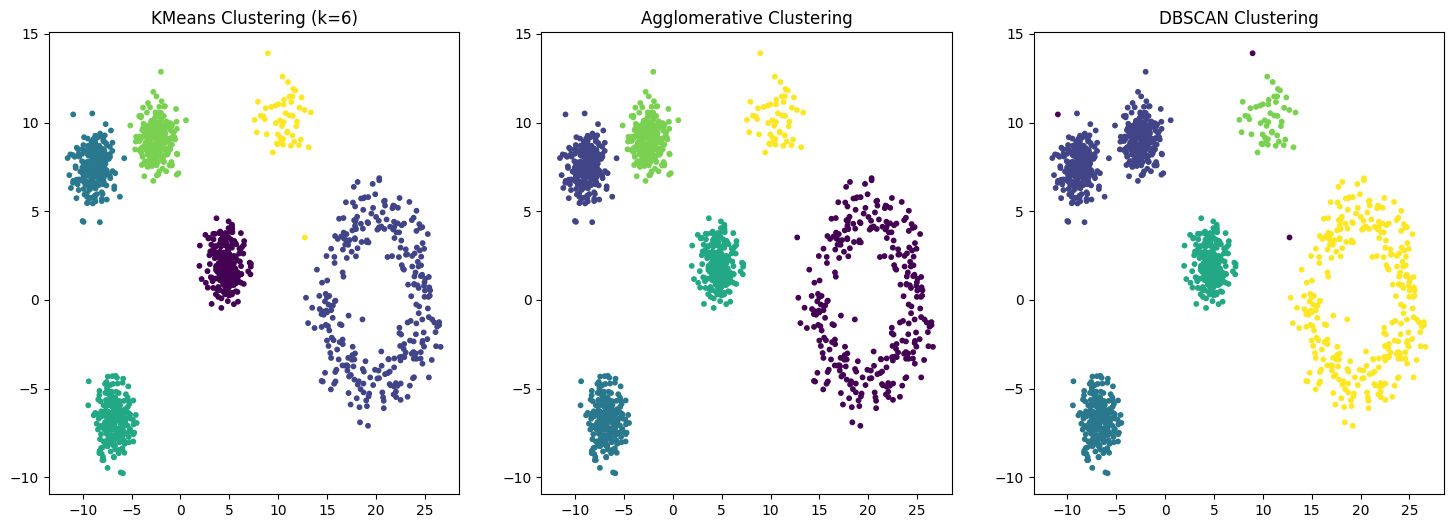

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
axes[0].set_title(f'KMeans Clustering (k={best_k})')
axes[1].scatter(X[:, 0], X[:, 1], c=agglo_labels, cmap='viridis', s=10)
axes[1].set_title('Agglomerative Clustering')
axes[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
axes[2].set_title('DBSCAN Clustering')
plt.show()